In [2]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [3]:
df_us_software_pivot = pd.read_csv('https://lukeb.co/software_csv', index_col='job_posted_month')

In [4]:
df_us = df[df['job_country'] == 'United States'].copy()
df_us['job_posted_month'] = df_us['job_posted_date'].dt.strftime('%B')
df_us_pivot = df_us.pivot_table(index='job_posted_month',columns='job_title_short',aggfunc='size')
df_us_pivot.reset_index(inplace=True)
df_us_pivot['month_no'] = pd.to_datetime(df_us_pivot['job_posted_month'], format='%B').dt.month
df_us_pivot.sort_values('month_no', inplace = True)
df_us_pivot.set_index('job_posted_month')
df_us_pivot.drop(columns='month_no', inplace=True)
df_us_pivot.index_col='job_posted_month'
df_us_pivot

job_title_short,job_posted_month,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
4,January,527,36,8494,2655,6915,60,1544,773,1552,114
3,February,447,24,6124,3060,4956,56,1258,878,1127,90
7,March,438,19,6218,3183,4779,59,1114,829,1150,115
0,April,565,40,6049,2801,4867,51,1025,781,991,112
8,May,279,20,4993,2976,4377,49,839,746,914,90
6,June,446,32,5683,2893,4645,48,1009,812,1033,93
5,July,581,39,5201,2570,4876,65,883,747,1095,153
1,August,903,39,6634,3269,6318,68,1186,903,1515,194
11,September,897,50,4639,3224,4568,113,805,775,1014,228
10,October,932,48,5271,3015,4882,101,871,672,987,219


In [5]:
merged_df = df_us_pivot.merge(df_us_software_pivot, on='job_posted_month')

In [6]:
merged_df

,job_posted_month,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
0,January,527,36,8494,2655,6915,60,1544,773,1552,114,13619,9827,5108,4348
1,February,447,24,6124,3060,4956,56,1258,878,1127,90,11456,9116,7298,4284
2,March,438,19,6218,3183,4779,59,1114,829,1150,115,11102,8178,5814,4159
3,April,565,40,6049,2801,4867,51,1025,781,991,112,14037,9209,7232,4220
4,May,279,20,4993,2976,4377,49,839,746,914,90,12126,8864,6718,4980
5,June,446,32,5683,2893,4645,48,1009,812,1033,93,12003,8065,5902,4781
6,July,581,39,5201,2570,4876,65,883,747,1095,153,11914,8061,6839,4344
7,August,903,39,6634,3269,6318,68,1186,903,1515,194,11571,8191,7413,4104
8,September,897,50,4639,3224,4568,113,805,775,1014,228,14016,8447,6139,4094
9,October,932,48,5271,3015,4882,101,871,672,987,219,11419,8476,5026,4389


In [14]:
top_5 = merged_df.select_dtypes(include='number').sum().sort_values(ascending=False).head().index.to_list()
top_5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'Data Analyst',
 'Data Scientist']

<Axes: >

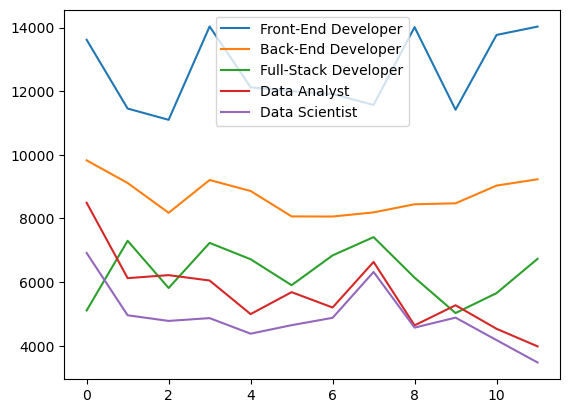

In [18]:
merged_df[top_5].plot(kind='line')